## Task 2:Prediction using Unsupervised ML

    (Level - Beginner)
<ul>
    <li>From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.</li>
    <li>Use R or Python or perform this task</li>
    <li>Dataset : https://bit.ly/3kXTdox</li>
    <li>Task : Classify the various species</li>

                                                                             :- Nupur Kanungo

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Iris.csv')

# Data Insights and Preprocessing

In [5]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
32,33,5.2,4.1,1.5,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica
20,21,5.4,3.4,1.7,0.2,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-virginica
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
124,125,6.7,3.3,5.7,2.1,Iris-virginica


In [6]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Check for Null Values

In [9]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["spc_code"] = lb_make.fit_transform(data.Species)

In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,spc_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
data.spc_code.unique()

array([0, 1, 2])

## Data Visualization

Text(0.5, 1.0, 'scatter')

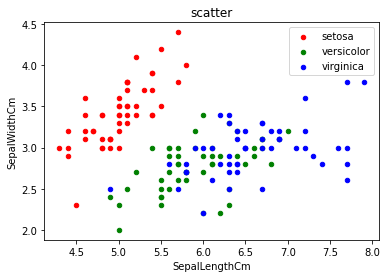

In [13]:
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

Text(0.5, 1.0, 'scatter')

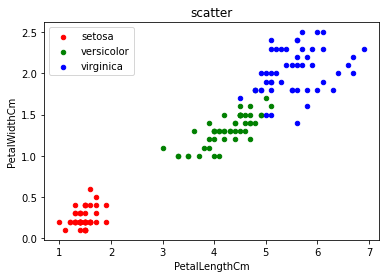

In [14]:
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

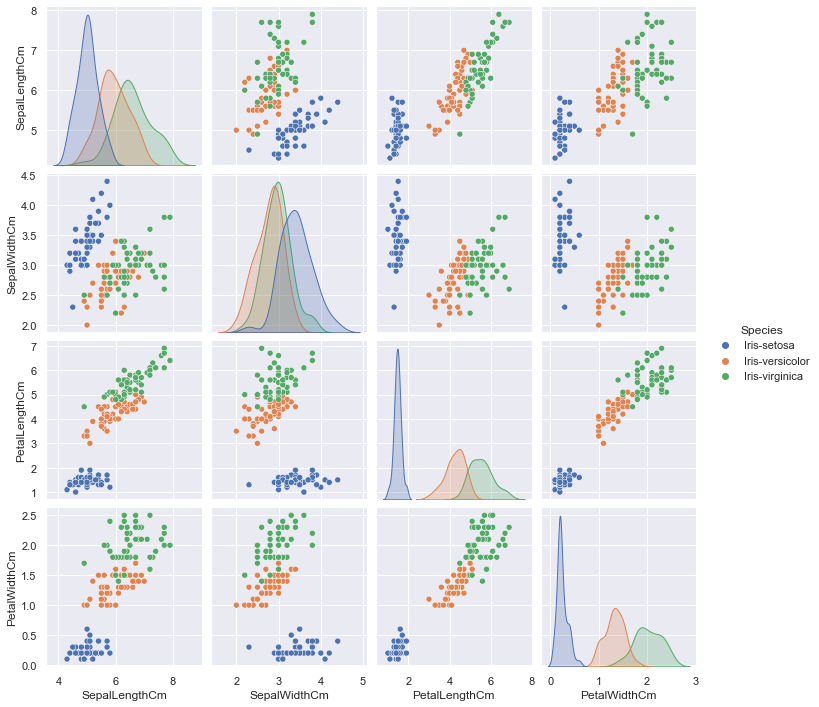

In [15]:
sns.set()
sns.pairplot(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],hue="Species", diag_kind="kde")

## X-Y Split

In [16]:
X = data.iloc[:,1:5].values
y = data['spc_code'].values

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((135, 4), (15, 4), (135,), (15,))

## K-Means

In [18]:
kmeans = KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=0)

In [19]:
pred = kmeans.predict(X_test)

In [20]:
kmeans.cluster_centers_

array([[6.87777778, 3.08888889, 5.69444444, 2.06666667],
       [4.99574468, 3.4       , 1.46808511, 0.24468085],
       [5.81538462, 2.72692308, 4.35769231, 1.42884615]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

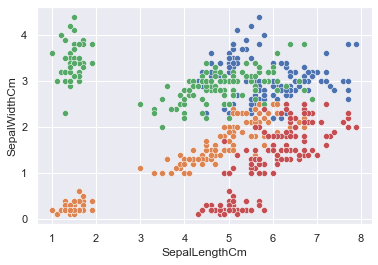

In [21]:
# scatter plots
# SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm 
sns.scatterplot(data['SepalLengthCm'],data['SepalWidthCm'])
sns.scatterplot(data = data, x = 'PetalLengthCm', y = 'PetalWidthCm')
sns.scatterplot(data = data, x = 'PetalLengthCm', y = 'SepalWidthCm')
sns.scatterplot(data = data, x = 'SepalLengthCm', y = 'PetalWidthCm')

# KNN

In [22]:
knn =KNeighborsClassifier(n_neighbors=5)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
pred = knn.predict(X_test)

df = pd.DataFrame({"Orignal":y_test,'Pred':pred})

In [25]:
df

,Orignal,Pred
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


In [26]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred)
acc

1.0

In [27]:
con_mat = confusion_matrix(y_test, pred, [0, 1])
con_mat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[3, 0],
       [0, 8]], dtype=int64)

# Thank You :)